In [3]:
import cv2 as cv
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import skimage.segmentation as segmentation

In [4]:
image = io.imread('images/footballer.jpg')

C:\ProgramData\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


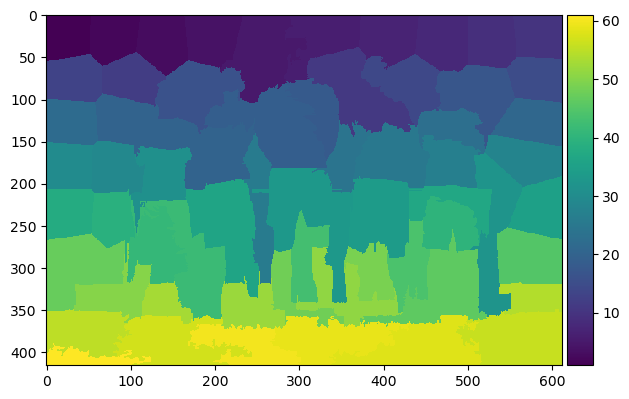

In [5]:
segmented_image = segmentation.slic(image, n_segments=100)
io.imshow(segmented_image)

In [6]:
loaded_image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(loaded_image,cv.COLOR_BGR2GRAY)
edged_image = cv.Canny(gray, threshold1=100, threshold2=100)

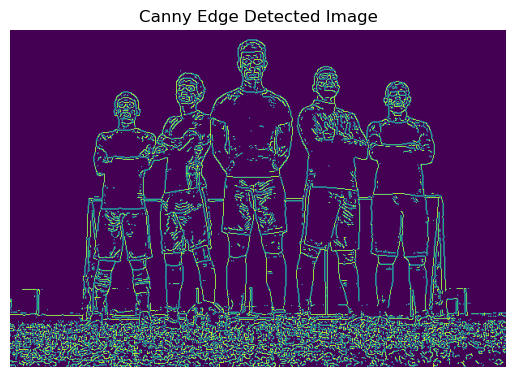

In [7]:
plt.title("Canny Edge Detected Image")
plt.axis("off")
plt.imshow(edged_image)

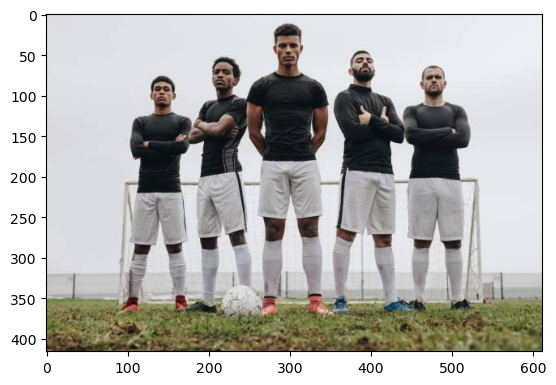

In [8]:
plt.imshow(image)

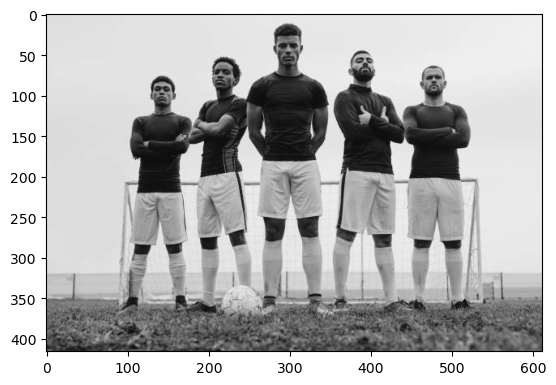

In [9]:
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap="gray")

In [10]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.filters import rank
from skimage.util import img_as_ubyte

In [11]:
from skimage.util import img_as_ubyte
image = img_as_ubyte(io.imread('images/footballer.jpg', as_gray=True))

In [12]:
denoised = rank.median(image, disk(2))

In [13]:
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

In [14]:
gradient = rank.gradient(denoised, disk(2))

In [15]:
labels = watershed(gradient, markers)

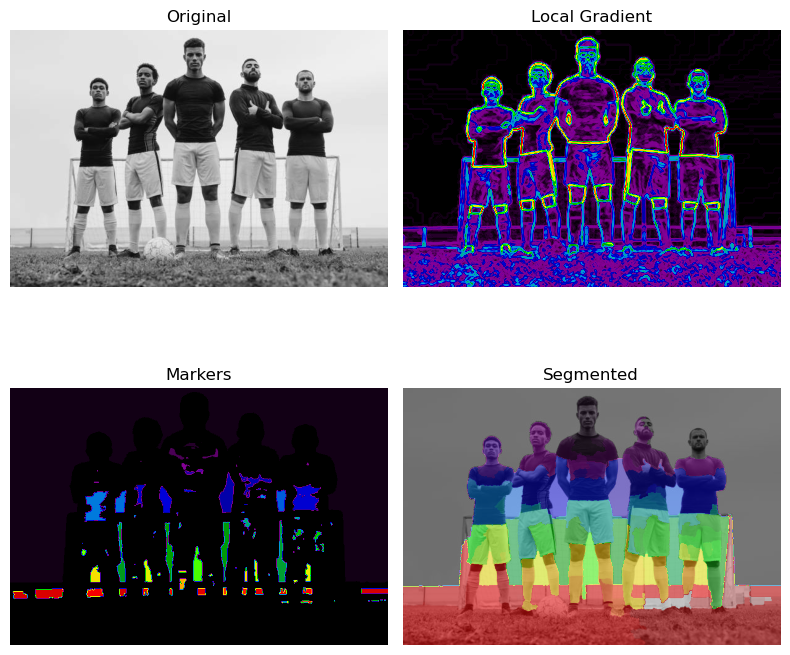

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")
ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")
ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [21]:
import cv2
import numpy as np
def refine_feature_detection(image):
  # Convert the image to grayscale.
  grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian blur to the image to smooth it out.
  blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

  # Detect edges in the image.
  edges = cv2.Canny(blurred_image, 50, 150)

  # Apply thresholding to the image to remove noise.
  thresholded_image = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)[1]

  # Dilate the image to fill in small gaps.
  dilated_image = cv2.dilate(thresholded_image, np.ones((3, 3), np.uint8))

  # Erode the image to remove small objects.
  eroded_image = cv2.erode(dilated_image, np.ones((3, 3), np.uint8))

  # Return the image with refined feature detection.
  return eroded_image

def main():
  # Load the image.
  image = cv2.imread("images/footballer.jpg")

  # Refine the feature detection in the image.
  refined_image = refine_feature_detection(image)

  # Display the original and refined images.
  cv2.imshow("main",image)
  cv2.imshow("refined",refined_image)
  cv2.waitKey(0)

if __name__ == "__main__":
  main()